# Prosper Loan Data
## by Shinyui Chu

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others. Also the data dictionary explains the variables in the data set. To explore the data thoroughly, we're going to choose 10 ~ 15 of the features to explore it further in this dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("prosperLoanData.csv")

In [3]:
df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [4]:
df.shape

(113937, 81)

In [5]:
df_extracted = df.iloc[:,[2, 3, 4, 5, 7, 15, 16, 18, 19, 21, 25, 26, 51, 63, 77, 80]] # select the features we need

In [6]:
df_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
ListingCreationDate          113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
CreditScoreRangeLower        113346 non-null float64
CreditScoreRangeUpper        113346 non-null float64
TotalProsperLoans            22085 non-null float64
LoanOriginalAmount           113937 non-null int64
Recommendations              113937 non-null int64
Investors                    113937 non-null int64
dtypes: bool(1), float64(5), int64(5), object(5)
memory usage:

In [7]:
df_extracted.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
0,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,NaN,0,Other,Self-employed,True,640.0,659.0,NaN,9425,0,258
1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,7.0,2,Professional,Employed,False,680.0,699.0,NaN,10000,0,1
2,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,NaN,0,Other,Not available,False,480.0,499.0,NaN,3001,0,41
3,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,9.0,16,Skilled Labor,Employed,True,800.0,819.0,NaN,10000,0,158
4,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,4.0,2,Executive,Employed,True,680.0,699.0,1.0,15000,0,20


In [8]:
df_extracted.describe()

,Term,BorrowerAPR,ProsperScore,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113912.000000,84853.000000,113937.000000,113346.000000,113346.000000,22085.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,5.950067,2.774209,685.567731,704.567731,1.421100,8337.01385,0.048027,80.475228
std,10.436212,0.080364,2.376501,3.996797,66.458275,66.458275,0.764042,6245.80058,0.332353,103.239020
min,12.000000,0.006530,1.000000,0.000000,0.000000,19.000000,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.156290,4.000000,1.000000,660.000000,679.000000,1.000000,4000.00000,0.000000,2.000000
50%,36.000000,0.209760,6.000000,1.000000,680.000000,699.000000,1.000000,6500.00000,0.000000,44.000000
75%,36.000000,0.283810,8.000000,3.000000,720.000000,739.000000,2.000000,12000.00000,0.000000,115.000000
max,60.000000,0.512290,11.000000,20.000000,880.000000,899.000000,8.000000,35000.00000,39.000000,1189.000000


In [9]:
df_extracted.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
0,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,NaN,0,Other,Self-employed,True,640.0,659.0,NaN,9425,0,258
1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,7.0,2,Professional,Employed,False,680.0,699.0,NaN,10000,0,1
2,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,NaN,0,Other,Not available,False,480.0,499.0,NaN,3001,0,41
3,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,9.0,16,Skilled Labor,Employed,True,800.0,819.0,NaN,10000,0,158
4,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,4.0,2,Executive,Employed,True,680.0,699.0,1.0,15000,0,20


### What is the structure of your dataset?

> The shape of the dataset is 113,937 by 81

### What is/are the main feature(s) of interest in your dataset?

> Some of the main features in this dataset are `CreditGrade`, `LoanStatus`, `BorrowerAPR`, `ProsperScore`, `IsBorrowerHomeowner`, `LoanOriginalAmount`, and `Invertors`.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The of features that will help suuport my investigation in this dataset are `ListingCreationDate`, `CreditGrade`, `Term`, `LoadStatus`, `BorrowerAPR`, 
`ProsperScore`, `ListingCategory (numeric)`, `Occupation`, `EmploymentStatus`, `IsBorrowerHomeowner`,  `CreditScoreRangeLower`, `CreditScoreUpper`, `TotalProsperLoans`, `LoanOriginalAmount`, `Recommendations` and `Invertors`.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

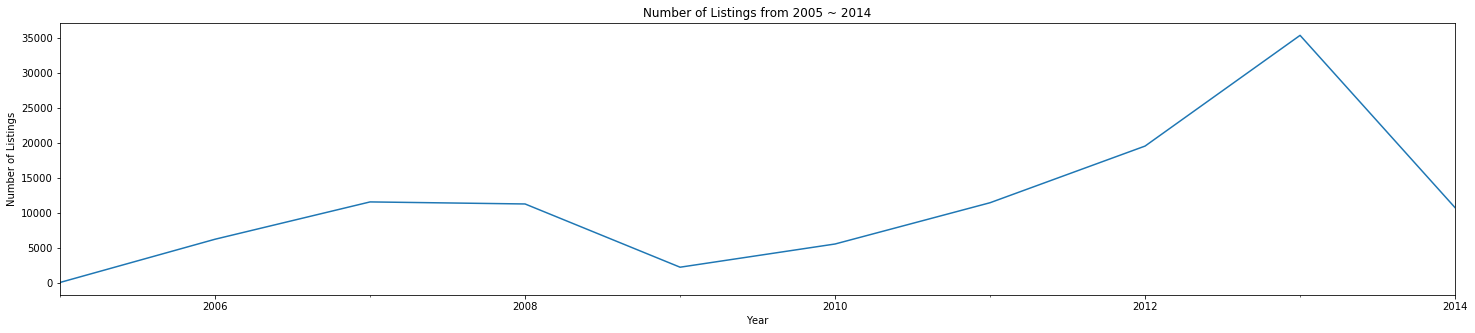

In [10]:
df_extracted["ListingCreationDate"] = pd.to_datetime(df_extracted["ListingCreationDate"])
# Count the number of litings created based on the year of creation
df_extracted.groupby(df_extracted["ListingCreationDate"].dt.to_period("Y"))["ListingCreationDate"].count().plot(figsize=(25, 5))
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.title("Number of Listings from 2005 ~ 2014");

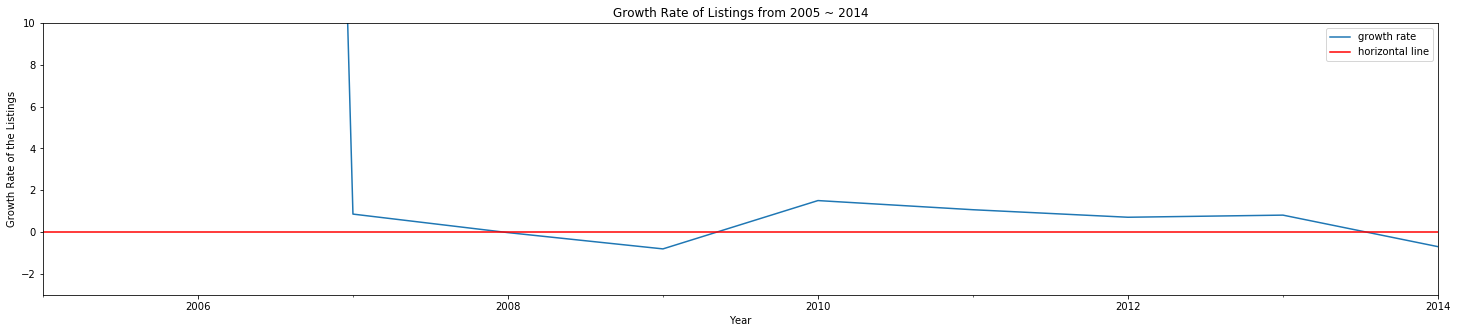

In [11]:
# Count the number of litings created based on the year of creation and caculate the growth rate
df_extracted.groupby(df_extracted["ListingCreationDate"].dt.to_period("Y"))["ListingCreationDate"].count().pct_change().plot(figsize=(25, 5), label="growth rate")
plt.ylim(-3, 10)
plt.axhline(c="r", label="horizontal line")
plt.xlabel("Year")
plt.ylabel("Growth Rate of the Listings")
plt.legend()
plt.title("Growth Rate of Listings from 2005 ~ 2014");

We want to have a quick overivew of how does the number of listings changes in different years, hence the first chart is created. However this is not enough, we want to dig in to the growth of each year, thus we also plotted the growth rate of each year. From these two plot we can observe that except the growth of from 2005 to 2006 (we can't sure the growth is due to data limitation or simply it's revealing the truth), the number of listing in 2010 growed a lot.

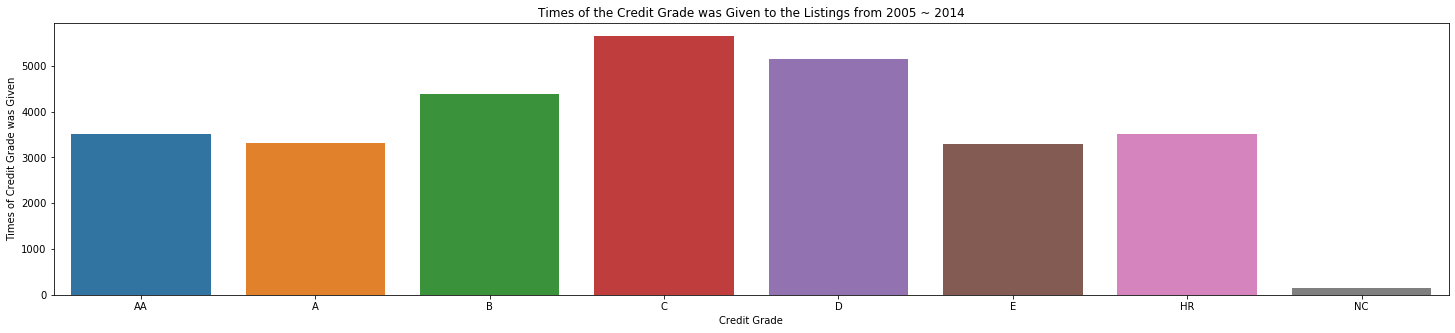

In [12]:
# order list of credit grade
credit_grade_order = ['AA', 'A', 'B', 'C',  'D', 'E', 'HR', 'NC']

df_extracted['CreditGrade'] = pd.Categorical(df_extracted['CreditGrade'],
                                            categories=credit_grade_order,
                                            ordered = True)
# create ordered categorical variable, using list
plt.figure(figsize=(25, 5))
sns.countplot(df_extracted["CreditGrade"])
plt.xlabel("Credit Grade")
plt.ylabel("Times of Credit Grade was Given")
plt.title("Times of the Credit Grade was Given to the Listings from 2005 ~ 2014");

We want to have a quick overview of the number of each credit grade, thus we created a countplot to count each credit grade in this dataset. We found out that most of the credit grade is C followed by D and B. It seems that most of the borrowers' credit grade isn't good.

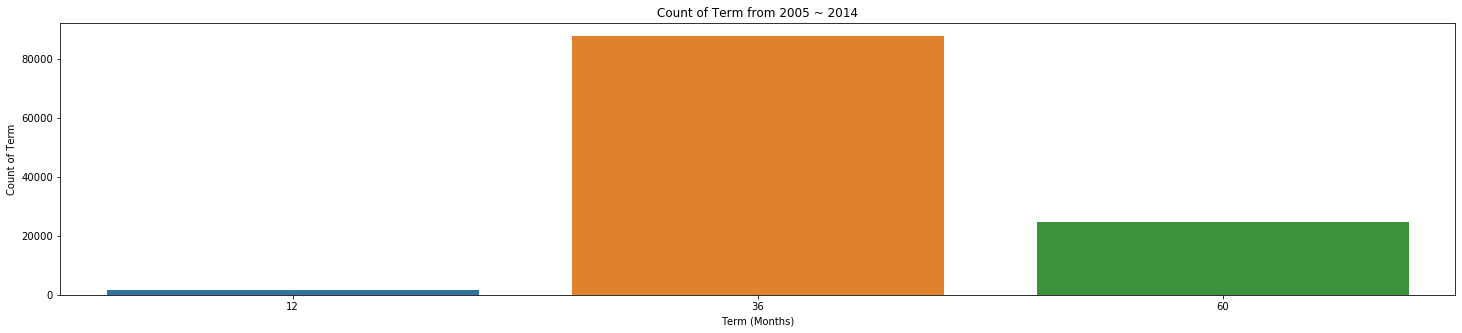

In [13]:
# order list of term order
term_order = [12, 36, 60]

# create ordered categorical variable, using list
df_extracted['Term'] = pd.Categorical(df_extracted['Term'],
                                            categories=term_order,
                                            ordered = True)
plt.figure(figsize=(25, 5))
sns.countplot(df_extracted["Term"])
plt.xlabel("Term (Months)")
plt.ylabel("Count of Term")
plt.title("Count of Term from 2005 ~ 2014");

We want to have a quick glance on the distribution of term. We found out that the term comes in 36 months (or 3 year) is the most common term than any other term listted on the dataset.

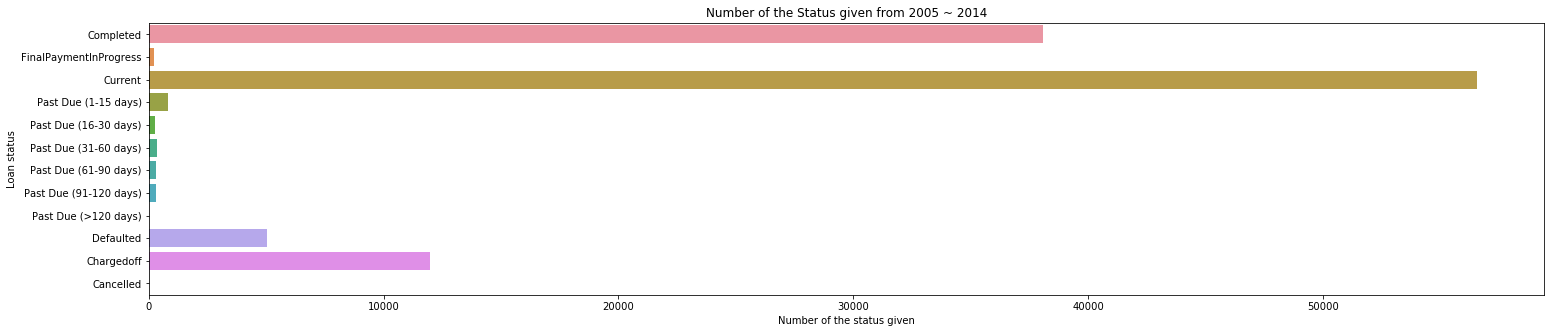

In [14]:
# order list of loan status
loan_status_order = ['Completed', 'FinalPaymentInProgress', 'Current',
                     'Past Due (1-15 days)', 
                     'Past Due (16-30 days)',
                     'Past Due (31-60 days)',
                     'Past Due (61-90 days)',
                     'Past Due (91-120 days)',
                     'Past Due (>120 days)',
                     'Defaulted','Chargedoff', 'Cancelled']

# create ordered categorical variable, using list
df_extracted['LoanStatus'] = pd.Categorical(df_extracted['LoanStatus'],
                                            categories=loan_status_order,
                                            ordered = True)
plt.figure(figsize=(25, 5))
sns.countplot(y=df_extracted["LoanStatus"])
plt.xlabel("Number of the status given")
plt.ylabel("Loan status")
plt.title("Number of the Status given from 2005 ~ 2014");

The dataset also includes the loan status (or the outcome) of the listings. Most of the listings are listed as current and completed. Other than that most of the listings are listed as defaulted and chargedoff. What would be the factors that affect the outcome of the loan? We'll dive into it in bivariate and multivariate analysis.

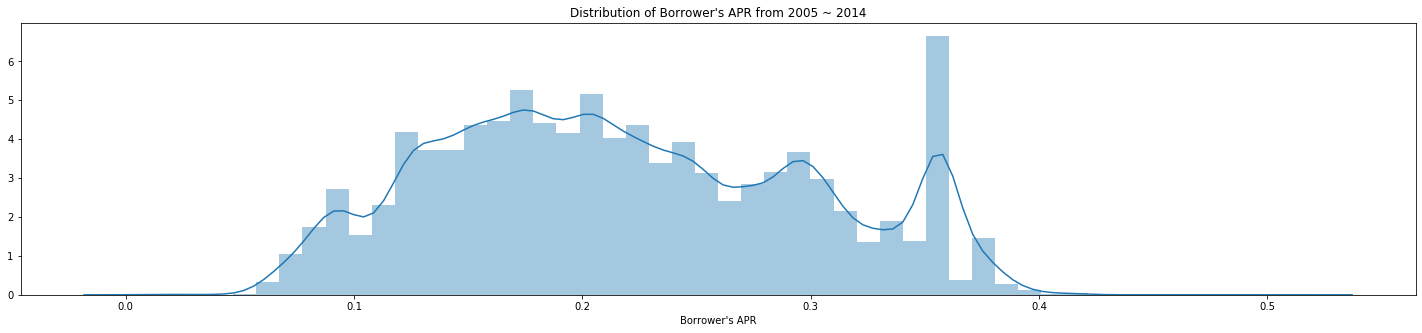

In [15]:
plt.figure(figsize=(25, 5))
sns.distplot(df_extracted["BorrowerAPR"].dropna())
plt.xlabel("Borrower's APR")
plt.title("Distribution of Borrower's APR from 2005 ~ 2014");

Borrower's APR is also one of the main feature in this dataset, so we want to know the distribution of this feature. We can observe that the distibution is closely to normal. It seems like the apr at 0.35 is the most common apr in the listings.

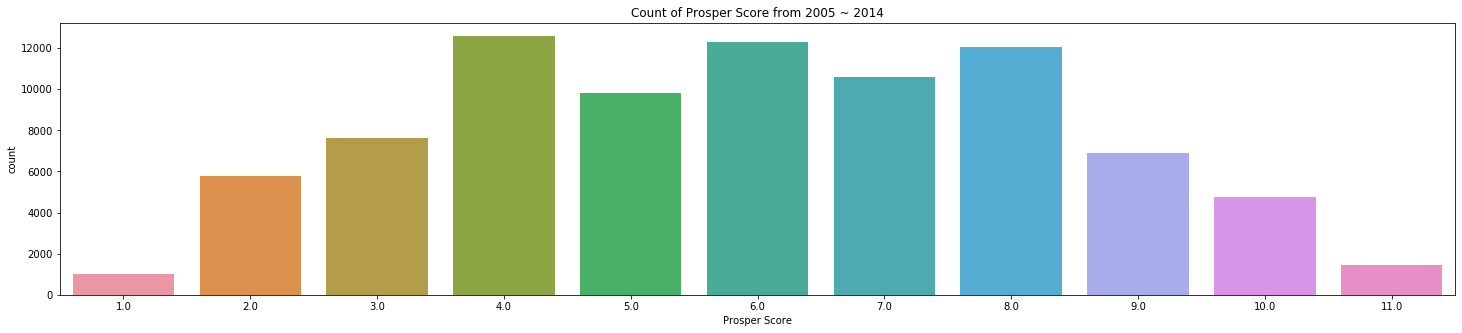

In [16]:
plt.figure(figsize=(25, 5))
sns.countplot(df_extracted["ProsperScore"])
plt.xlabel("Prosper Score")
plt.title("Count of Prosper Score from 2005 ~ 2014");

From the bar plot above we can oberve that top 3 of the prosper score are 4.0, 6.0 and 8.0, idealy the score should be as higher as possible.

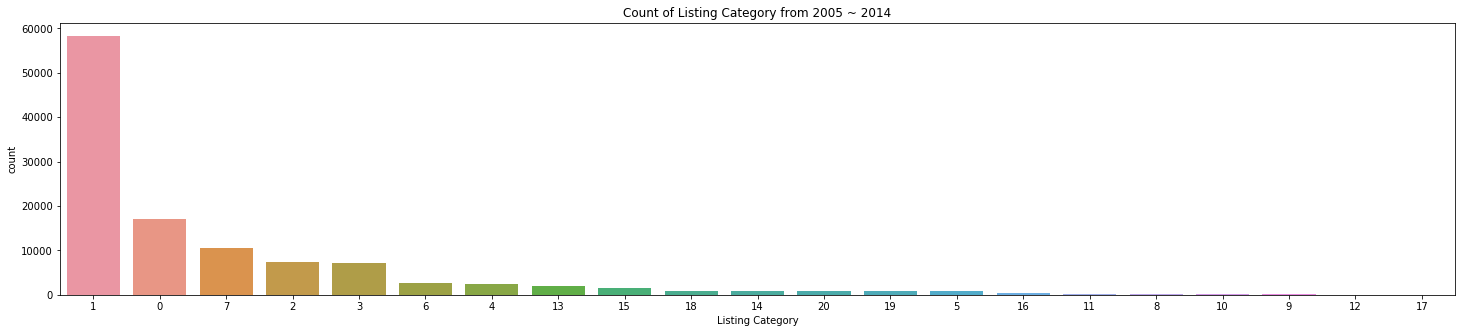

In [17]:
plt.figure(figsize=(25, 5))
sns.countplot(df_extracted["ListingCategory (numeric)"], order=df_extracted["ListingCategory (numeric)"].value_counts().index)
plt.xlabel("Listing Category")
plt.title("Count of Listing Category from 2005 ~ 2014");

We want to know the category of the listings.  As we referenced to the data dictionary, it seems that most of the category was fallen into debt consolication followed by N/A and other. We can check the relationhip between category and investors involved to find out more information.

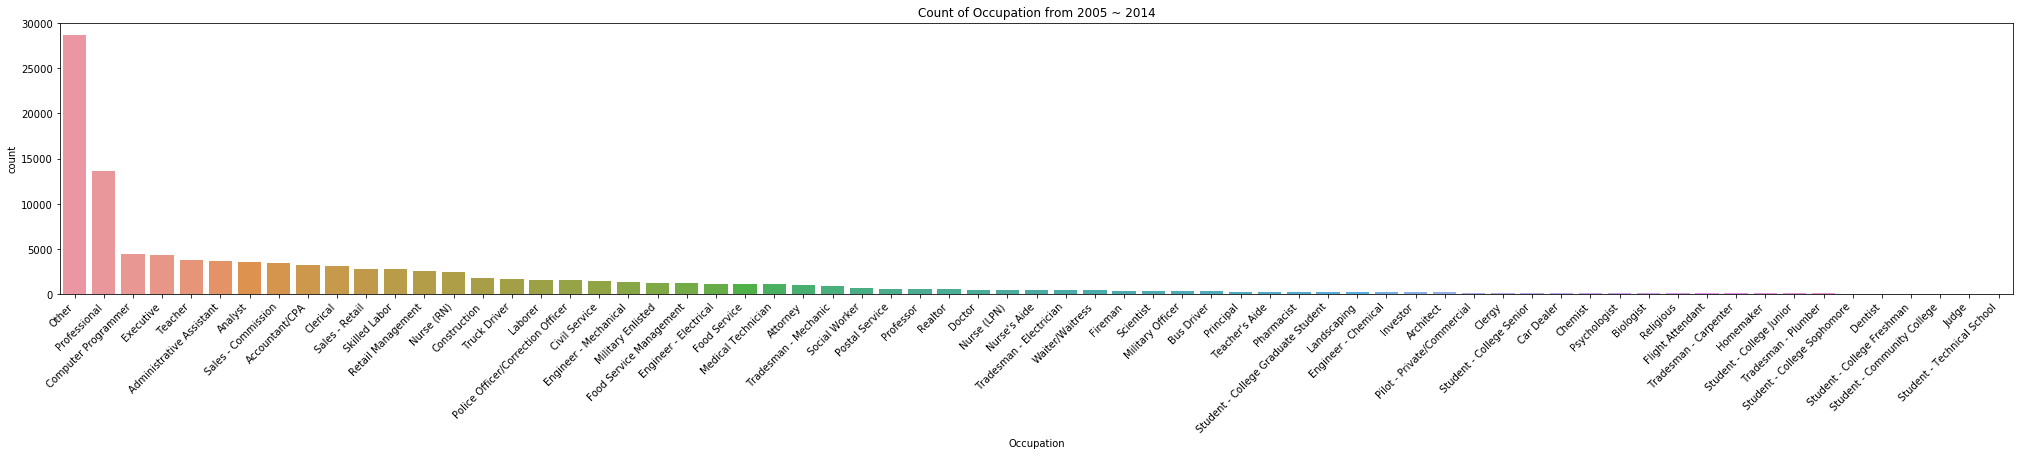

In [18]:
plt.figure(figsize=(35, 5))
chart = sns.countplot(df_extracted["Occupation"], order=df_extracted["Occupation"].value_counts().index)

# rotate the labels to avoid overlap
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.xlabel("Occupation")
plt.title("Count of Occupation from 2005 ~ 2014");

From the plot above we can observe that the second most people apply the loan are usually professionals and followed by programmer. We can investiage this variable more by comparing it with other features like listings category or loan status.

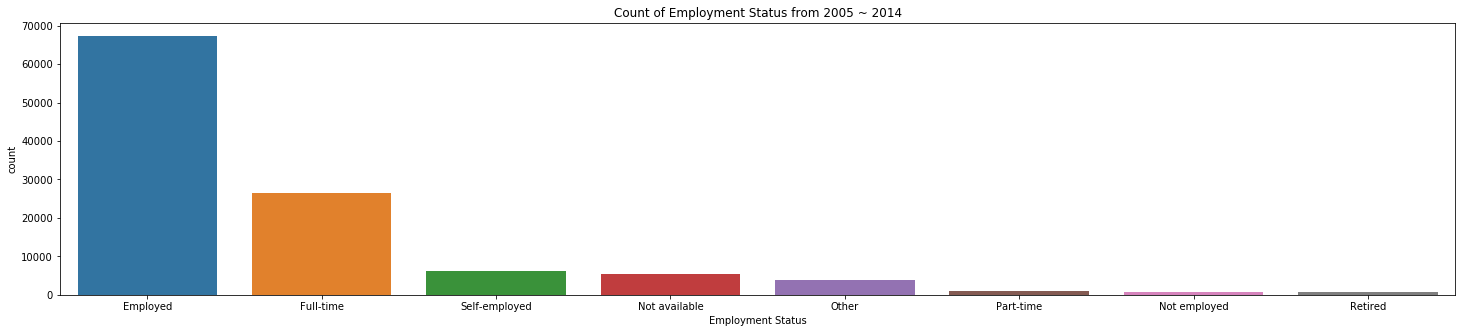

In [19]:
plt.figure(figsize=(25, 5))

# ordered by largest to smallest
sns.countplot(df_extracted["EmploymentStatus"], order=df_extracted["EmploymentStatus"].value_counts().index)
plt.xlabel("Employment Status")
plt.title("Count of Employment Status from 2005 ~ 2014");

Employment status might affect apr, hence we plot the count of employment status. It seems like most of the borowers are employed.

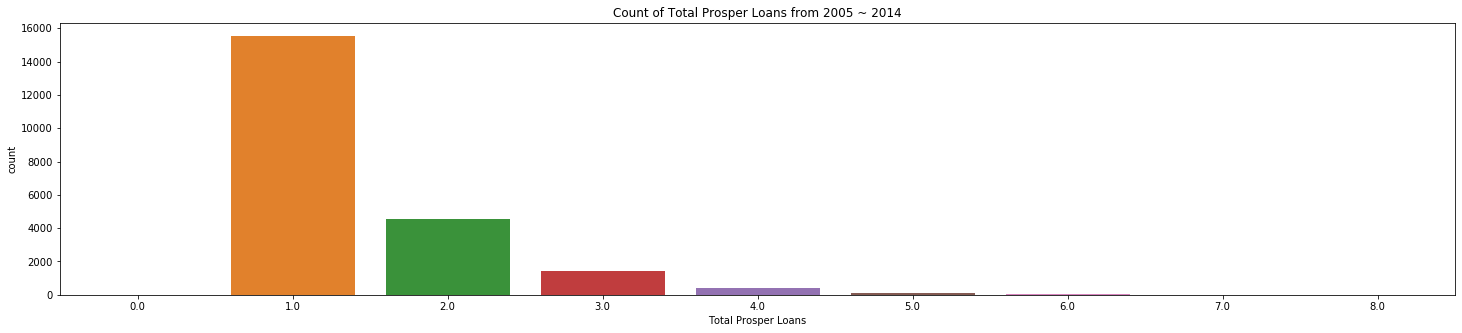

In [20]:
plt.figure(figsize=(25, 5))
sns.countplot(df_extracted["TotalProsperLoans"])
plt.xlabel("Total Prosper Loans")
plt.title("Count of Total Prosper Loans from 2005 ~ 2014");

Number of the prosper loan might also affect the apr, hence we plot the count of total prosper loans. From the plot above we can observe that most of the borrowers had applied loans before.

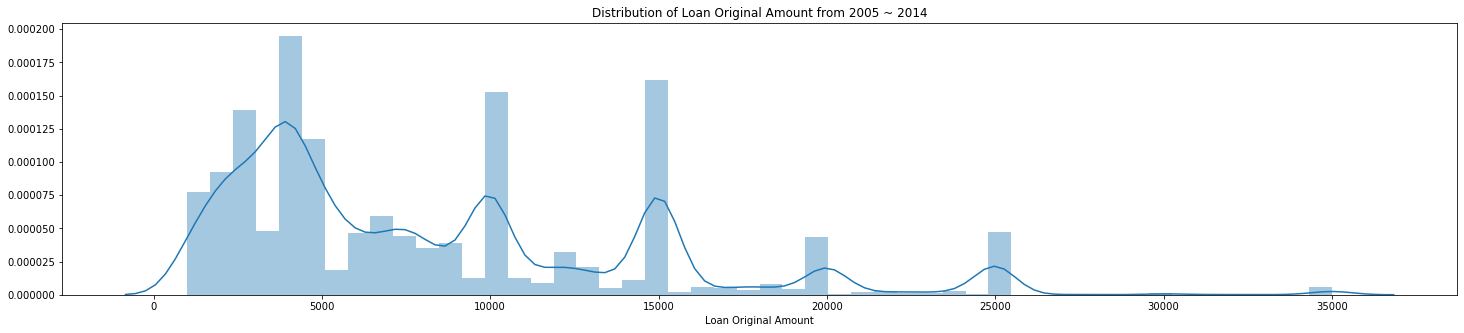

In [21]:
plt.figure(figsize=(25, 5))

# drop the na value to avoid error
sns.distplot(df_extracted["LoanOriginalAmount"].dropna())
plt.xlabel("Loan Original Amount")
plt.title("Distribution of Loan Original Amount from 2005 ~ 2014");

The loan amount is one of the main feature in this dataset, hence we plot the distribution of this dataset. It seems like there are multiple peak of the loan amount. What affect the loan amount? We'll dive into to that question in the later section.

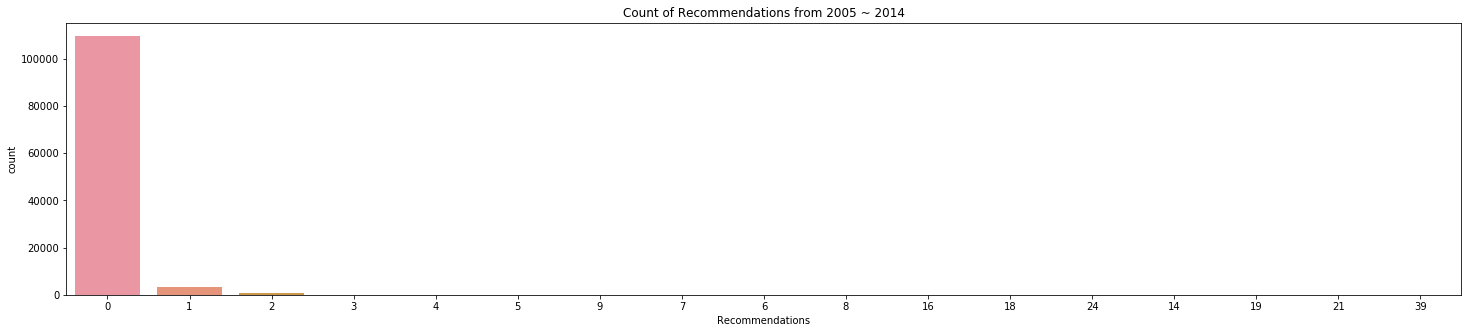

In [22]:
plt.figure(figsize=(25, 5))

# sort by the number of recommendations from the largest to smallest
sns.countplot(df_extracted["Recommendations"], order=df_extracted["Recommendations"].value_counts().index)
plt.xlabel("Recommendations")
plt.title("Count of Recommendations from 2005 ~ 2014");

The number of the recommendations of the listings could be an important factor, hence we created the count of the recommendations. From the plot above we can conclude that most of the listings' recommendations is 0.

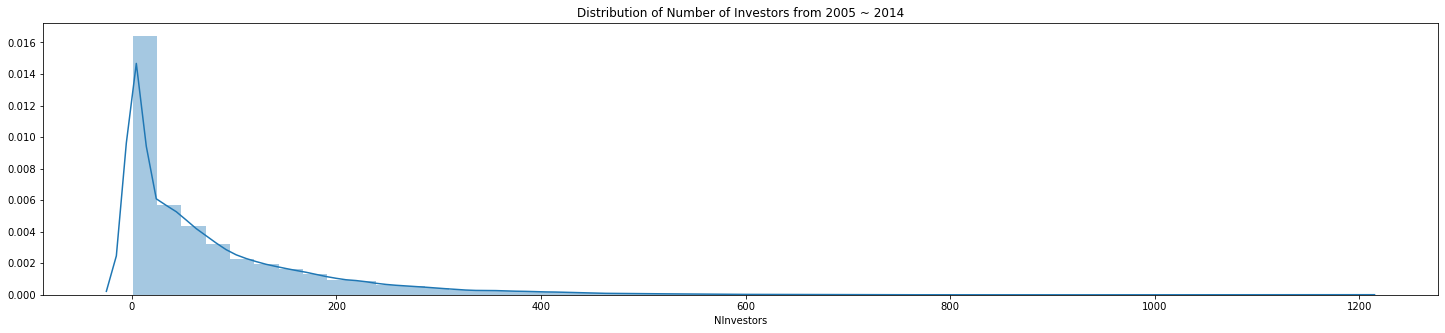

In [23]:
plt.figure(figsize=(25, 5))

# drop the nan to avoid error
sns.distplot(df_extracted["Investors"].dropna())
plt.xlabel("NInvestors")
plt.title("Distribution of Number of Investors from 2005 ~ 2014");

The distribution of number of investors seems to have right skewed, most of the listings require less investors while others might need alot of investors. We can futher check the relationship between the loan amount and the number of investors involved in the loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After investigating the data, we found out that some of the variables are interesting that worth to dive in further such as, number of investors, loan amount etc.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

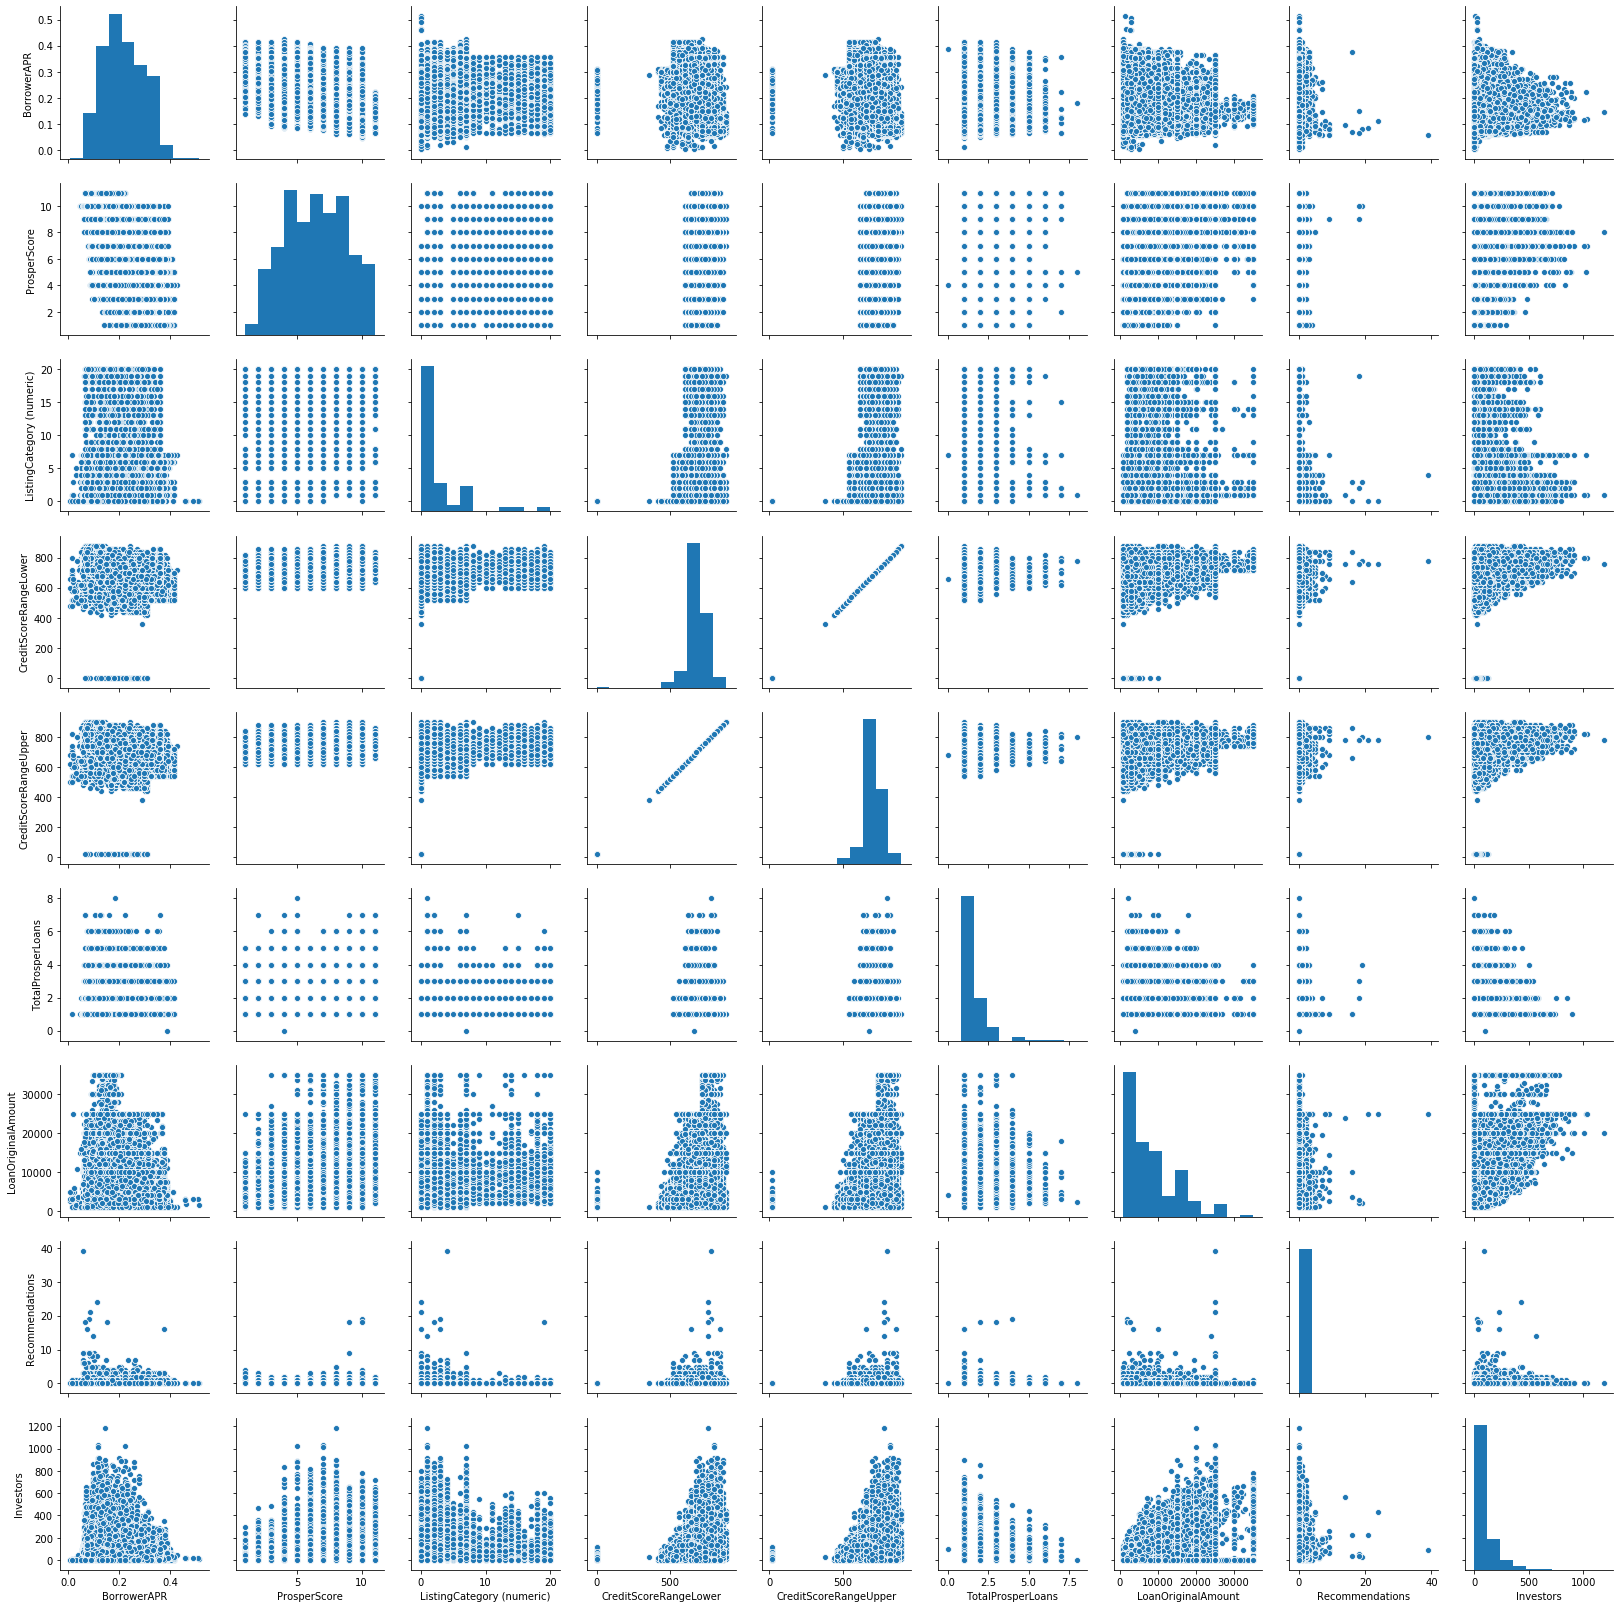

In [24]:
sns.pairplot(df_extracted[df_extracted.describe().columns]);

We need to check the relationship between lots of features, if we plot these features one by one. We would have wasted lots of time, hence we use pairplot to bulk plot these features. From the plot above we can observe the relationship between each features with another. There are few things that worth to be noticed:
- Higher prosper score tends to have lower apr
- Credit score seems to have some relationship with apr but not strong
- More investors involved in the listings seem to have higher apr

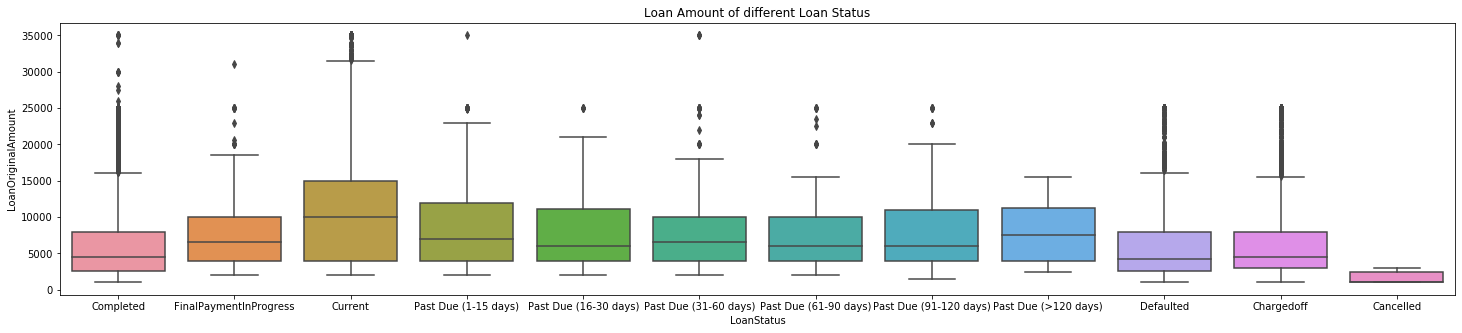

In [25]:
# order list of loan status
loan_status_order = ['Completed', 'FinalPaymentInProgress', 'Current',
                     'Past Due (1-15 days)', 
                     'Past Due (16-30 days)',
                     'Past Due (31-60 days)',
                     'Past Due (61-90 days)',
                     'Past Due (91-120 days)',
                     'Past Due (>120 days)',
                     'Defaulted','Chargedoff', 'Cancelled']

# create ordered categorical variable, using list
df_extracted['LoanStatus'] = pd.Categorical(df_extracted['LoanStatus'],
                                            categories=loan_status_order,
                                            ordered = True)
plt.figure(figsize=(25, 5))
sns.boxplot(x=df_extracted["LoanStatus"], y=df_extracted["LoanOriginalAmount"])
plt.title("Loan Amount of different Loan Status");

We've seen that except the listings that are declared completed or current most of the listings are declared defaulted and chargedoff. We also wonder that what will affect the outcome of loan. The first factor that pop out is loan amount, hence we check the loan amount distribution of each outcome and we found out that there not much diference between each outcome.

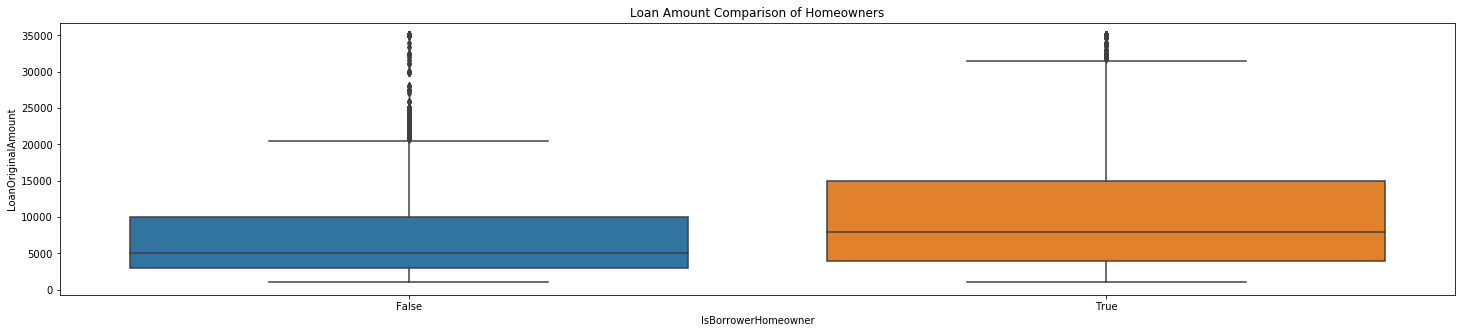

In [26]:
plt.figure(figsize=(25, 5))
sns.boxplot(x=df_extracted["IsBorrowerHomeowner"], y=df_extracted["LoanOriginalAmount"])
plt.title("Loan Amount Comparison of Homeowners");

We think that one of the factor that might affect loan amount is Homeowner, since the lending club can take borrowers' house as collateral. So they might allow homeowners to loan more money. After we plot the boxplot, it agree with our assumption.

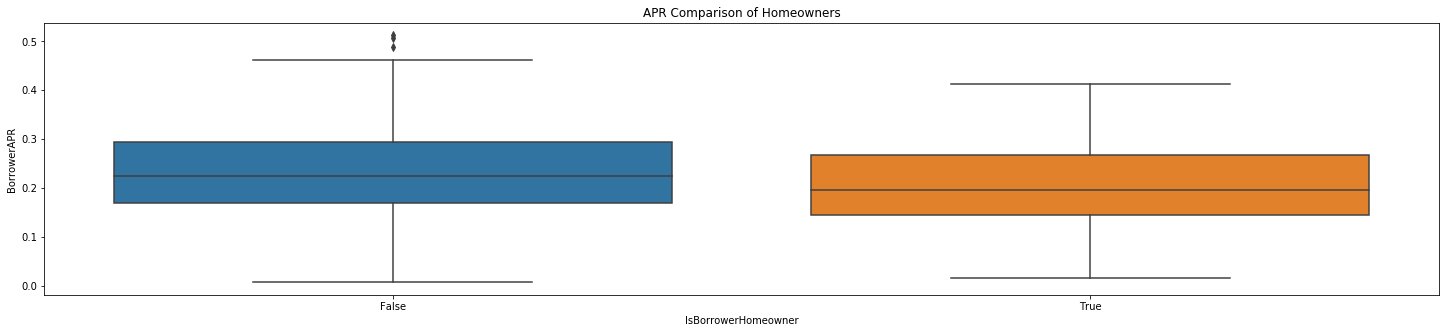

In [27]:
plt.figure(figsize=(25, 5))
sns.boxplot(x=df_extracted["IsBorrowerHomeowner"], y=df_extracted["BorrowerAPR"])
plt.title("APR Comparison of Homeowners");

Along with the loan amount we also want to know whether the borrower is homeowner or not will affect the APR. From the plot above we can see that it seems like homeowners tend to get lower APR than non-homeowners.

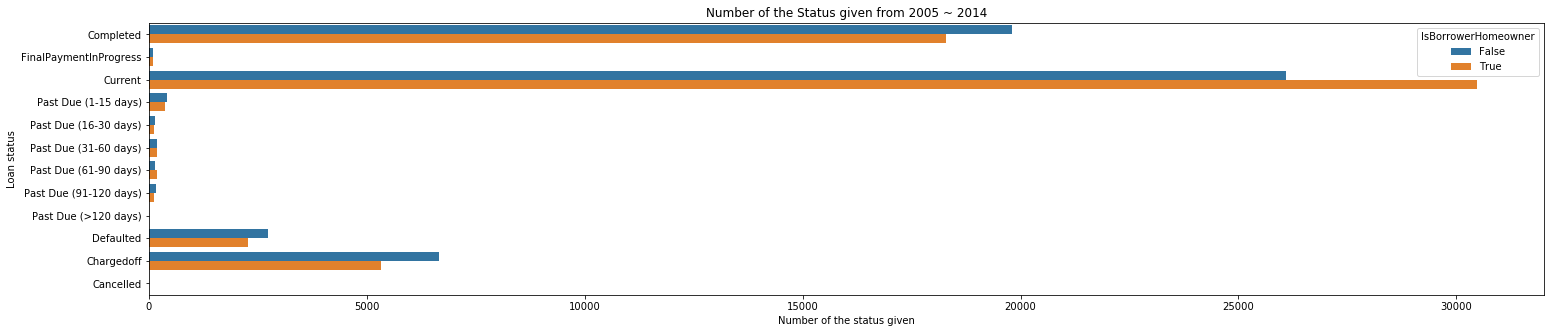

In [28]:
# order list of loan status
loan_status_order = ['Completed', 'FinalPaymentInProgress', 'Current',
                     'Past Due (1-15 days)', 
                     'Past Due (16-30 days)',
                     'Past Due (31-60 days)',
                     'Past Due (61-90 days)',
                     'Past Due (91-120 days)',
                     'Past Due (>120 days)',
                     'Defaulted','Chargedoff', 'Cancelled']

# create ordered categorical variable, using list
df_extracted['LoanStatus'] = pd.Categorical(df_extracted['LoanStatus'],
                                            categories=loan_status_order,
                                            ordered = True)
plt.figure(figsize=(25, 5))
sns.countplot(y=df_extracted["LoanStatus"], hue=df_extracted["IsBorrowerHomeowner"])
plt.xlabel("Number of the status given")
plt.ylabel("Loan status")
plt.title("Number of the Status given from 2005 ~ 2014");

We've seen that except the listings that are declared completed or current most of the listings are declared defaulted and chargedoff. Hence we want to further discover this phenomenon, we add the feature "IsBrrowerHomeowner" to see the difference. It seems like Non-homeowners' loan seems to have higher possibilities to be declared defaulted or chargedoff.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the plots above, we can conclude few things 
- Higher prosper score tends to have lower apr
- Credit score seems to have some relationship with apr but not strong
- More investors involved in the listings seem to have higher apr
- The completed loan's distribution seems to be similar as the loan that are declared chargedoff
- Homeowner seems to have higher loan amount
- Homeowner seems to have lower apr
- Non-homeowners' loan seems to have higher possibilities to be declared defaulted or chargedoff

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

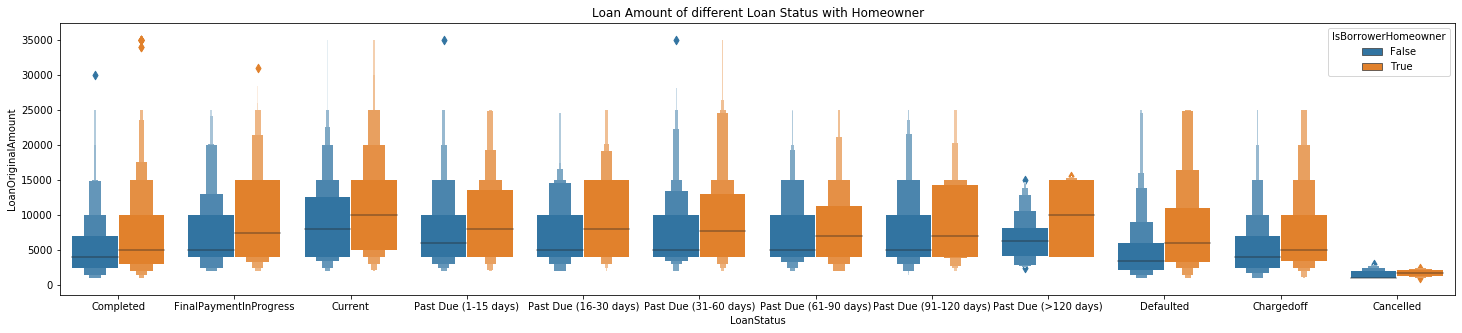

In [29]:
# order list or loan status
loan_status_order = ['Completed', 'FinalPaymentInProgress', 'Current',
                     'Past Due (1-15 days)', 
                     'Past Due (16-30 days)',
                     'Past Due (31-60 days)',
                     'Past Due (61-90 days)',
                     'Past Due (91-120 days)',
                     'Past Due (>120 days)',
                     'Defaulted','Chargedoff', 'Cancelled']

# create ordered categorical variable, using list
df_extracted['LoanStatus'] = pd.Categorical(df_extracted['LoanStatus'],
                                            categories=loan_status_order,
                                            ordered = True)
plt.figure(figsize=(25, 5))
sns.boxenplot(x=df_extracted["LoanStatus"], y=df_extracted["LoanOriginalAmount"], hue=df_extracted["IsBorrowerHomeowner"])
plt.title("Loan Amount of different Loan Status with Homeowner");

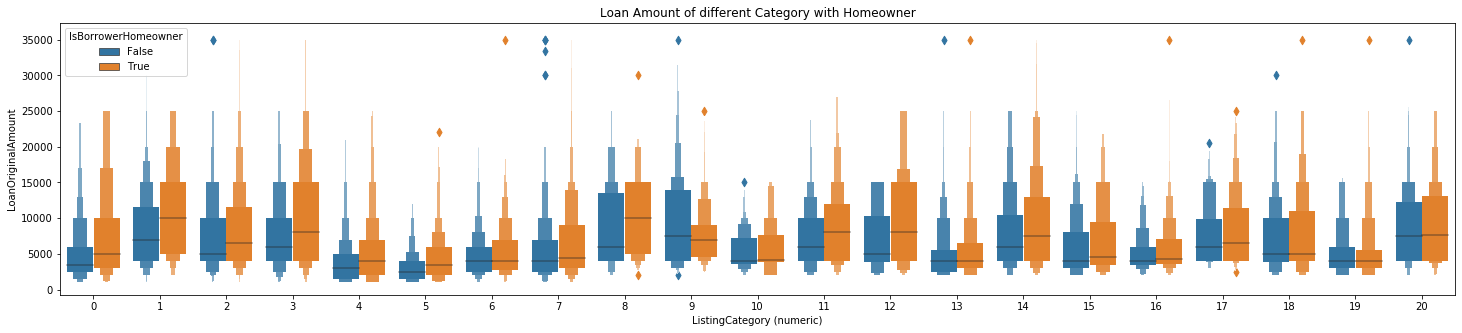

In [30]:
plt.figure(figsize=(25, 5))
sns.boxenplot(x=df_extracted["ListingCategory (numeric)"], y=df_extracted["LoanOriginalAmount"], hue=df_extracted["IsBorrowerHomeowner"])
plt.title("Loan Amount of different Category with Homeowner");

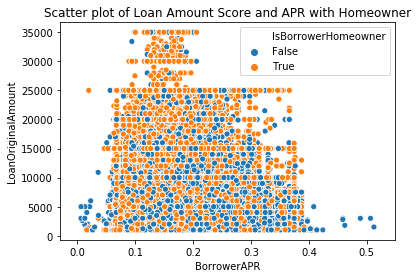

In [31]:
sns.scatterplot(y=df_extracted["LoanOriginalAmount"], x=df_extracted["BorrowerAPR"], hue=df_extracted["IsBorrowerHomeowner"])
plt.title("Scatter plot of Loan Amount Score and APR with Homeowner");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the plots aobve we can conlude that, those who are house owner tends to have applied more loan than those they don't. Also whe we compare the apr with loan we found out that there's no explicit as we add the feature "IsBorrowerHomeowner" we didn't see much different as well.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!